# EDA of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
psy = pd.read_csv('Youtube01-Psy.csv')
katty = pd.read_csv('Youtube02-KatyPerry.csv')
Lmfao = pd.read_csv('Youtube03-LMFAO.csv')
Eminem = pd.read_csv('Youtube04-Eminem.csv')
shakira = pd.read_csv('Youtube04-Eminem.csv')

In [4]:
data=pd.concat([psy,katty,Lmfao,Eminem,shakira])

In [5]:
del data['DATE']
del data['COMMENT_ID']
del data['AUTHOR']

In [6]:
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
443,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,Check out my videos guy! :) Hope you guys had ...,1
445,3 yrs ago I had a health scare but thankfully ...,1
446,Rihanna looks so beautiful with red hair ;)﻿,0


In [7]:
data.columns

Index(['CONTENT', 'CLASS'], dtype='object')

In [8]:
data.groupby('CONTENT').describe()

CLASS                      \
                                                   count mean  std  min  25%   
CONTENT                                                                        
  Check out my SEXY VIDEO :*                         4.0  1.0  0.0  1.0  1.0   
  Eminem is the king of rap  Micheal Jackson is...   2.0  1.0  0.0  1.0  1.0   
  HI!:D!:) We’ re TWIN MELODY ,17 year old twin...   1.0  1.0  NaN  1.0  1.0   
 <br />Please help me get 100 subscribers by th...   1.0  1.0  NaN  1.0  1.0   
 Facebook account HACK!! http://hackfbaccountli...   1.0  1.0  NaN  1.0  1.0   
...                                                  ...  ...  ...  ...  ...   
❤️ ❤️ ❤️ ❤️ ❤️❤️❤️❤️﻿                                1.0  0.0  NaN  0.0  0.0   
❤️❤️❤️﻿                                              2.0  0.0  0.0  0.0  0.0   
😫😓😏😪😔😖😌😭😎😚😘😙😗😋😝😜😛😍😒😞😷😶😵😳😲😱😟😰😩😨😧😦😥😤😣😮😴😢😡😠😬😕😑😐😯😉😈...   1.0  0.0  NaN  0.0  0.0   
😼👍😏 Like This Comment 😏👍😼﻿                           1.0  1.0  NaN  1.0  1.0   
🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨<br />NOW THAT I HAVE YOUR ATTE...   1.0  1.0  NaN  1.0  1.0   

                                                                   
                                                    50%  75%  max  
CONTENT                                                            
  Check out my SEXY VIDEO :*                        1.0  1.0  1.0  
  Eminem is the king of rap  Micheal Jackson is...  1.0  1.0  1.0  
  HI!:D!:) We’ re TWIN MELODY ,17 year old twin...  1.0  1.0  1.0  
 <br />Please help me get 100 subscribers by th...  1.0  1.0  1.0  
 Facebook account HACK!! http://hackfbaccountli...  1.0  1.0  1.0  
...                                                 ...  ...  ...  
❤️ ❤️ ❤️ ❤️ ❤️❤️❤️❤️﻿                               0.0  0.0  0.0  
❤️❤️❤️﻿                                             0.0  0.0  0.0  
😫😓😏😪😔😖😌😭😎😚😘😙😗😋😝😜😛😍😒😞😷😶😵😳😲😱😟😰😩😨😧😦😥😤😣😮😴😢😡😠😬😕😑😐😯😉😈...  0.0  0.0  0.0  
😼👍😏 Like This Comment 😏👍😼﻿                          1.0  1.0  1.0  
🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨<br />NOW THAT I HAVE YOUR ATTE...  1.0  1.0  1.0  

[1440 rows x 8 columns]

Text(0.5, 1.0, 'Distribution of reviews ')

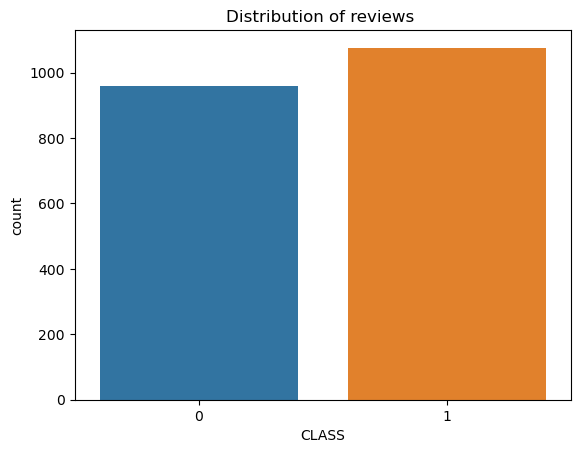

In [9]:
#plotting graph for distribution
sns.countplot(x = "CLASS", data = data)
data.loc[:, 'CLASS'].value_counts()
plt.title('Distribution of reviews ')

In [10]:
data['CLASS'].unique()

array([1, 0], dtype=int64)

Training model:

In [11]:
#!pip install nltk

In [12]:
import nltk
nltk.download('stopwords')
df=data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'CONTENT':],df['CLASS'],test_size=0.2)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627 entries, 140 to 262
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1627 non-null   object
 1   CLASS    1627 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.1+ KB


Text(0.5, 1.0, '')

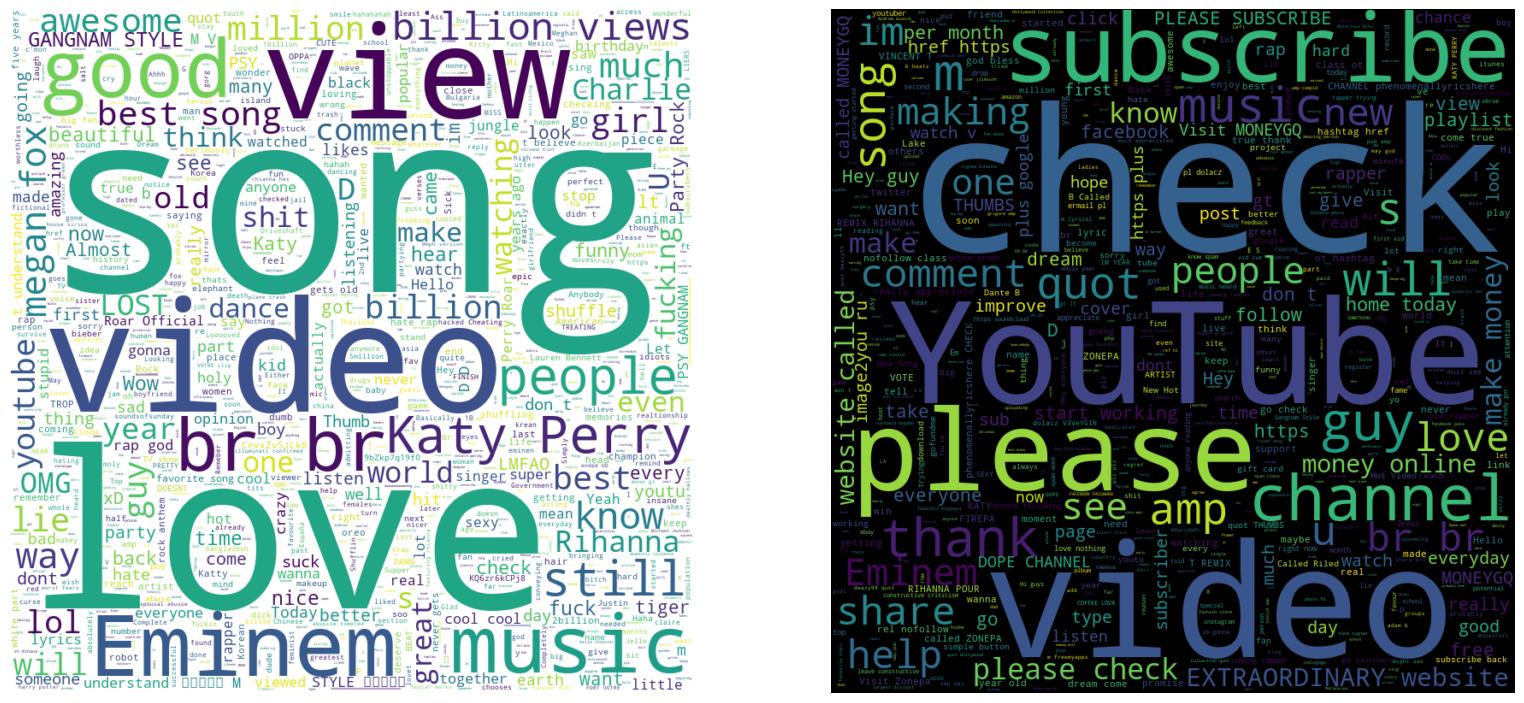

In [15]:
from wordcloud import WordCloud

positive=' '.join(X.loc[y==0,'CONTENT'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(positive)

negative=' '.join(X.loc[y==1,'CONTENT'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(negative)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')

